In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import load_model
from keras.utils import Sequence
import keras.backend as K

Using TensorFlow backend.


In [3]:
def init_model(path, finetune=True, up_to=7):
    model = load_model(path)
    model.load_weights(path)
    if finetune:
        for layer in model.layers[:up_to]:
            layer.trainable = False
    return model

In [4]:
def reset_weights(model):
    # Note this only used for visualization below
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

In [5]:
# load model weights
model_path = "/analysis/share/Ritter/models/fabi/ADNI/pretraining_paper/model_trial_8_backup.h5"
fine_tuned_weights = "/analysis/fabiane/models/MS/pretrained/rebuild_64Net/new_script/weights-augm-trial7-improvement-BEST.hdf5"
model = init_model(model_path, finetune=False, up_to=None)
print(model.summary())

model_untrained = load_model(model_path)
reset_weights(model_untrained)

model_fine_tuned = load_model(model_path)
model_fine_tuned.load_weights(fine_tuned_weights)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv3D)              (None, 94, 112, 94, 64)   1792      
_________________________________________________________________
Pool_1 (MaxPooling3D)        (None, 31, 37, 31, 64)    0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 31, 37, 31, 64)    0         
_________________________________________________________________
Conv_2 (Conv3D)              (None, 29, 35, 29, 64)    110656    
_________________________________________________________________
Pool_2 (MaxPooling3D)        (None, 9, 11, 9, 64)      0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 9, 11, 9, 64)      0         
_________________________________________________________________
Conv_3 (Conv3D)              (None, 7, 9, 7, 64)       110656    
__________

## Visualization

In [6]:
def visualize_weights(model, layer=0, nrows=2, figsize=(20, 20)):
    # Visualize weights
    W = model.layers[layer].get_weights()[0]
    W = np.reshape(W, (W.shape[0], W.shape[1], W.shape[2], W.shape[3] * W.shape[4]))
    print(W.shape)
    W = W[:,:,2]
    print(W.shape)
    #W = np.squeeze(W)[:,:,2]
    print("W shape : ", W.shape)

    print("Weights mean {}".format(W.mean()))
    plt.figure(figsize=figsize)
    plt.title('layer {} weights'.format(layer))
    plt.imshow(make_mosaic(W, nrows=nrows), cmap="gray")
    plt.show()

In [7]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[-1]
    imshape = imgs.shape[:2]
    ncols = int(np.floor(nimgs / nrows))
    #print(ncols)
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    print(mosaic.shape)
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    row = 0
    for i in range(nimgs):
        #print("next")
        #print(i)
        row = int(np.floor(i / ncols))
        col = i % ncols
        #print(row * paddedh)
        #print(row * paddedh + imshape[0])
        #print(col * paddedw)
        #print(col * paddedw + imshape[1])
        #print(mosaic[row * paddedh:row * paddedh + imshape[0],
        #       col * paddedw:col * paddedw + imshape[1]].shape)
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[:,:,i]
    return mosaic

# Layer 0

Random model layer 1 weights:
(3, 3, 3, 64)
(3, 3, 64)
W shape :  (3, 3, 64)
Weights mean -0.0016164827393367887
(7, 127)


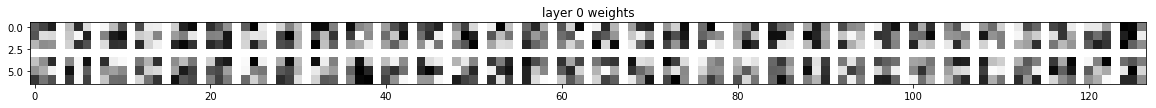

Pre-trained model layer 1 weights:
(3, 3, 3, 64)
(3, 3, 64)
W shape :  (3, 3, 64)
Weights mean -0.002088675508275628
(7, 127)


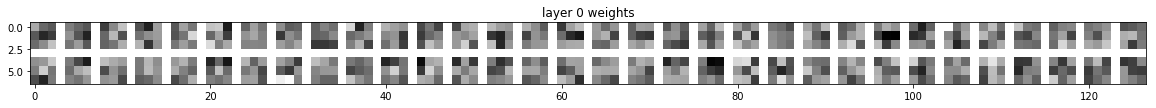

Fine-tuned model layer 1 weights:
(3, 3, 3, 64)
(3, 3, 64)
W shape :  (3, 3, 64)
Weights mean 0.005987854674458504
(7, 127)


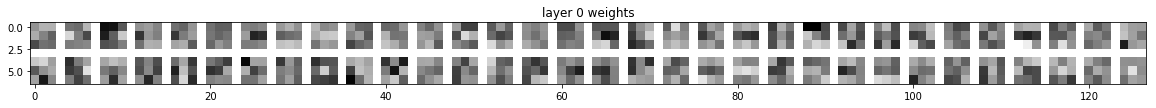

In [8]:
# Visualize weights
print("Random model layer 1 weights:")
visualize_weights(model_untrained, layer=0)
print("Pre-trained model layer 1 weights:")
visualize_weights(model, layer=0)
print("Fine-tuned model layer 1 weights:")
visualize_weights(model_fine_tuned, layer=0)

# Layer 3

Random model layer 3 weights:
(3, 3, 3, 4096)
(3, 3, 4096)
W shape :  (3, 3, 4096)
Weights mean 8.036008512135595e-05
(255, 255)


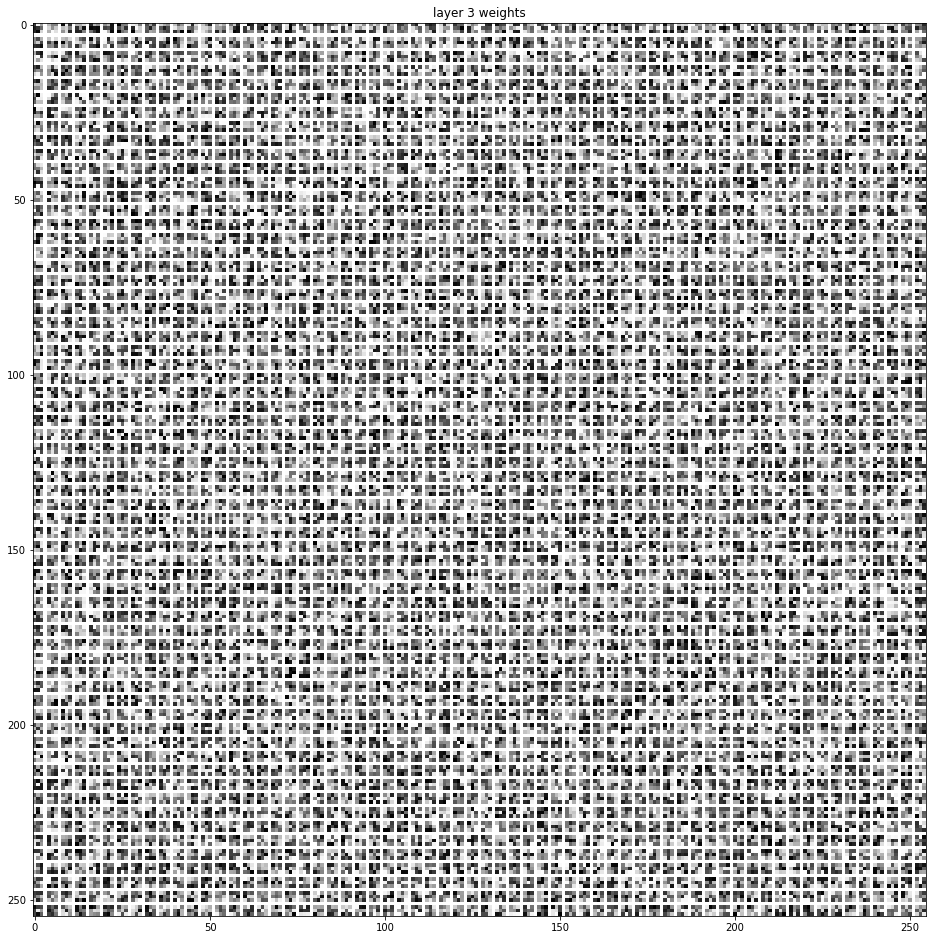

Pre-trained model layer 3 weights:
(3, 3, 3, 4096)
(3, 3, 4096)
W shape :  (3, 3, 4096)
Weights mean -0.0016689612530171871
(255, 255)


/home/fabiane/anaconda2/envs/postal/lib/python3.6/site-packages/matplotlib/image.py:419: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / 0.8)


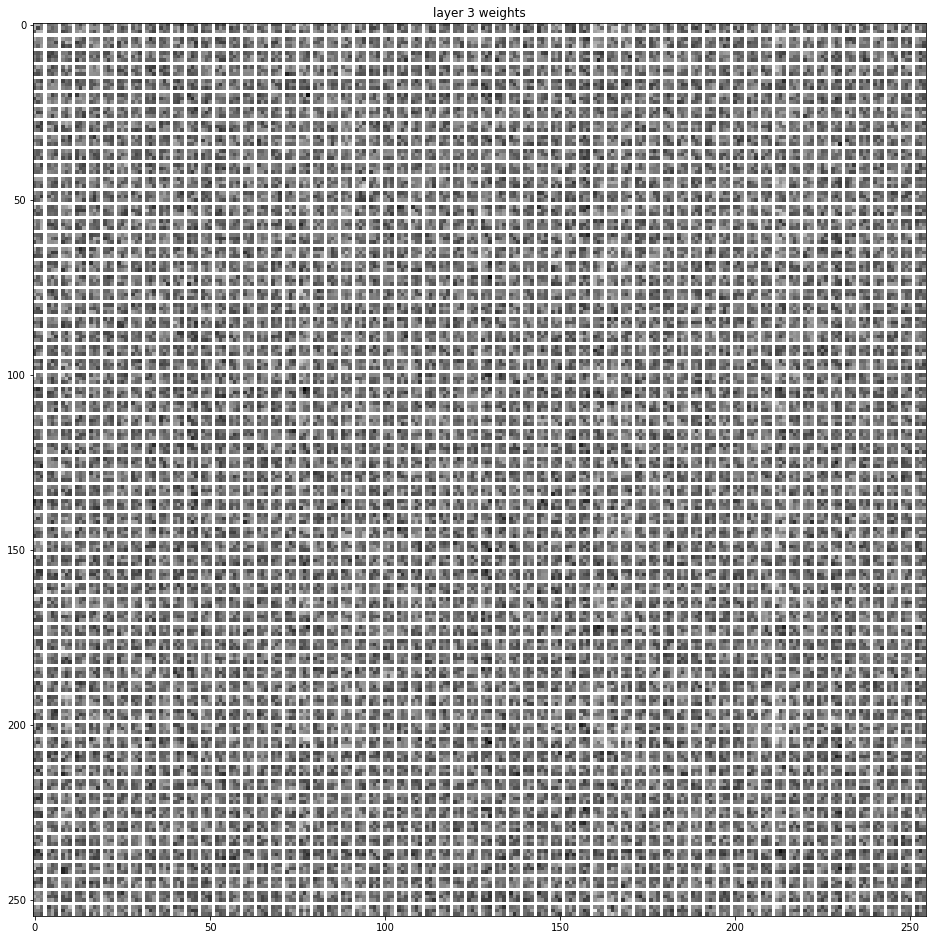

Fine-tuned model layer 3 weights:
(3, 3, 3, 4096)
(3, 3, 4096)
W shape :  (3, 3, 4096)
Weights mean -0.003524535335600376
(255, 255)


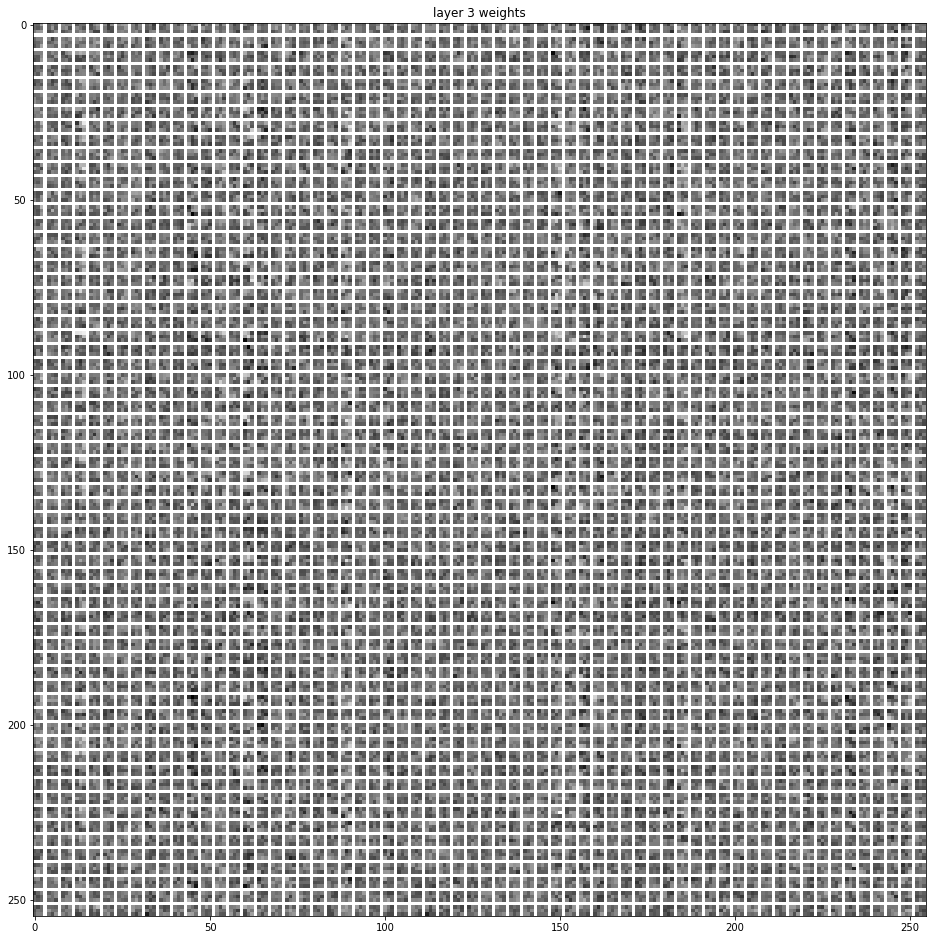

In [9]:
l = 3
# Visualize weights
print("Random model layer {} weights:".format(l))
visualize_weights(model_untrained, layer=l, nrows=64, figsize=(16, 32))
print("Pre-trained model layer {} weights:".format(l))
visualize_weights(model, layer=l, nrows=64, figsize=(16, 32))
print("Fine-tuned model layer {} weights:".format(l))
visualize_weights(model_fine_tuned, layer=l, nrows=64, figsize=(16, 32))

# Layer 6

Random model layer 6 weights:
(3, 3, 3, 4096)
(3, 3, 4096)
W shape :  (3, 3, 4096)
Weights mean -5.967001925455406e-05
(255, 255)


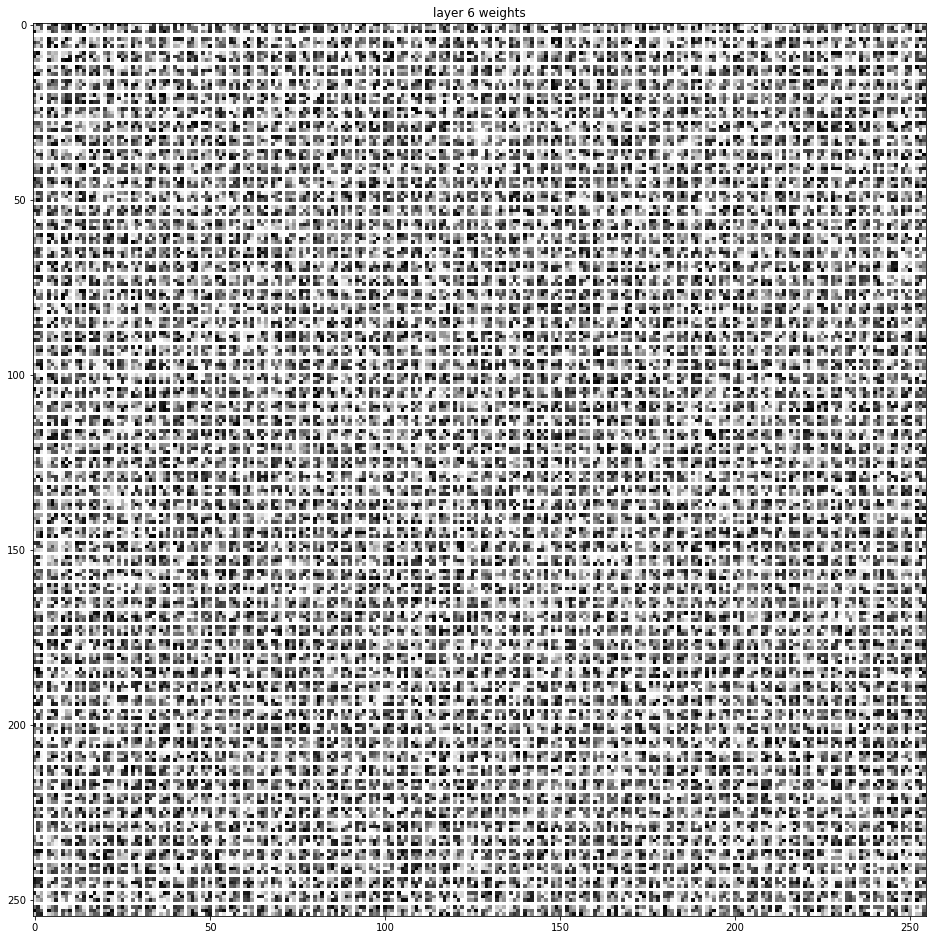

Pre-trained model layer 6 weights:
(3, 3, 3, 4096)
(3, 3, 4096)
W shape :  (3, 3, 4096)
Weights mean 7.832489063730463e-05
(255, 255)


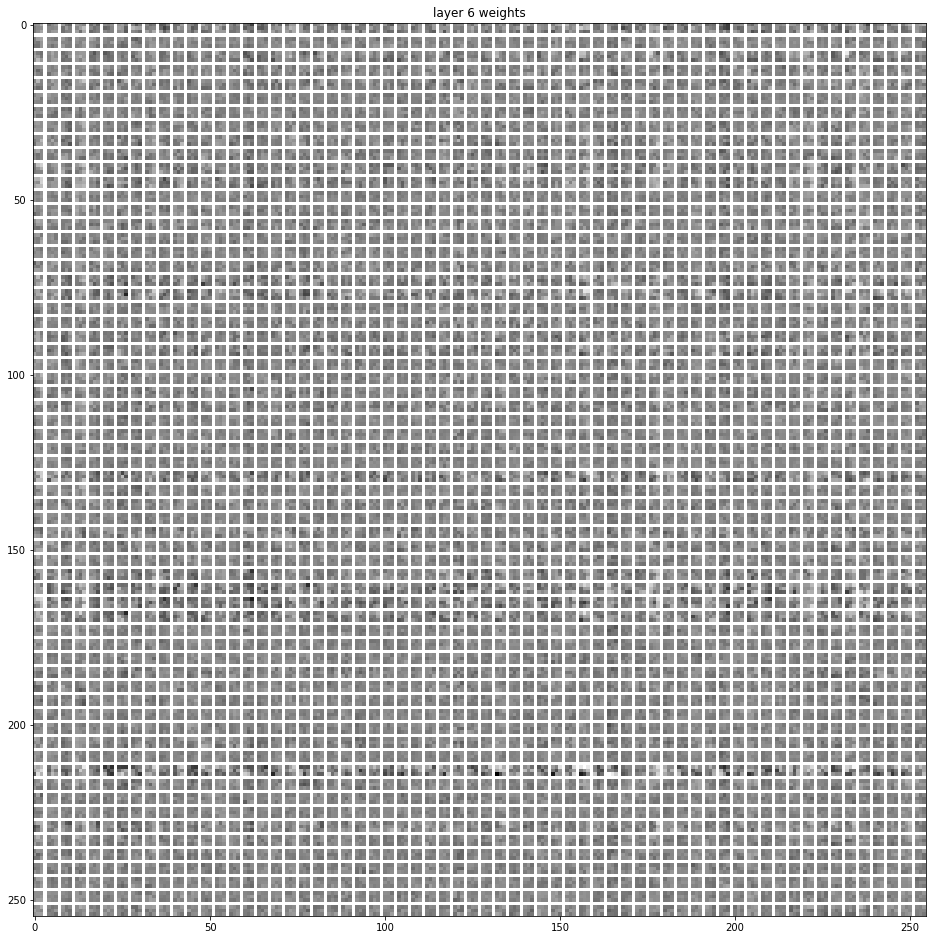

Fine-tuned model layer 6 weights:
(3, 3, 3, 4096)
(3, 3, 4096)
W shape :  (3, 3, 4096)
Weights mean -8.871423051459715e-05
(255, 255)


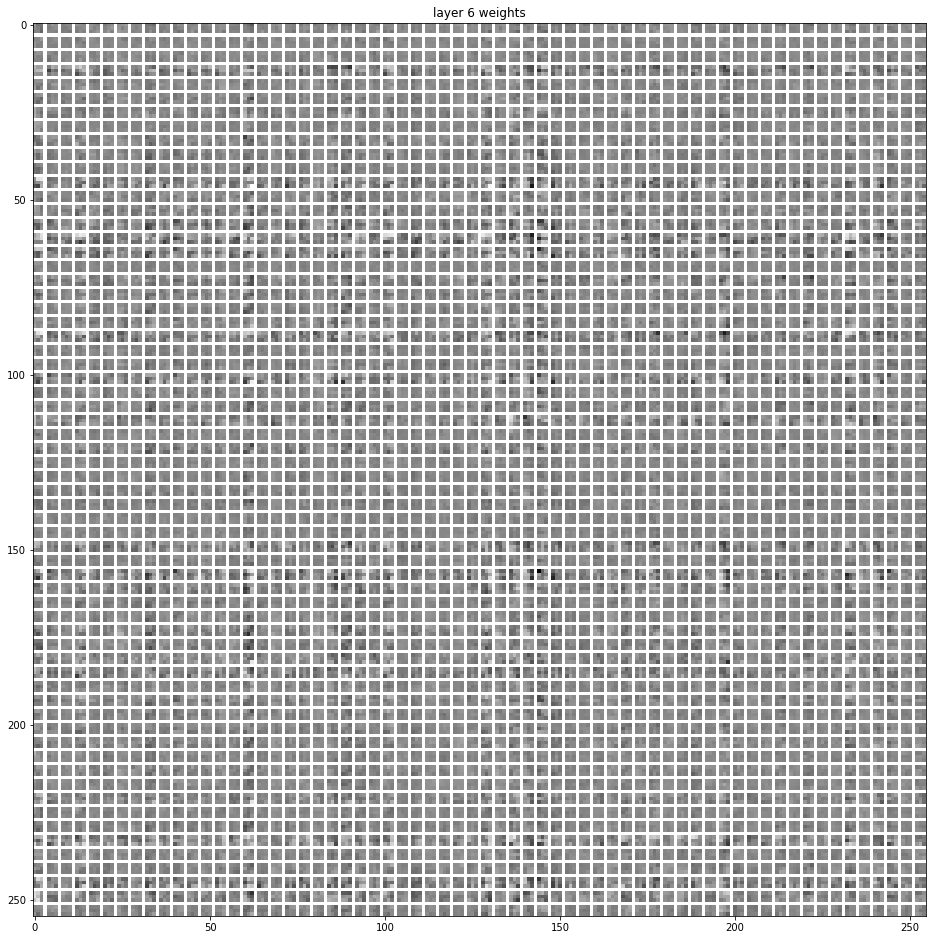

In [10]:
l = 6
# Visualize weights
print("Random model layer {} weights:".format(l))
visualize_weights(model_untrained, layer=l, nrows=64, figsize=(16, 32))
print("Pre-trained model layer {} weights:".format(l))
visualize_weights(model, layer=l, nrows=64, figsize=(16, 32))
print("Fine-tuned model layer {} weights:".format(l))
visualize_weights(model_fine_tuned, layer=l, nrows=64, figsize=(16, 32))

# Layer 7

Random model layer 7 weights:
(3, 3, 3, 4096)
(3, 3, 4096)
W shape :  (3, 3, 4096)
Weights mean -6.28959639925597e-07
(255, 255)


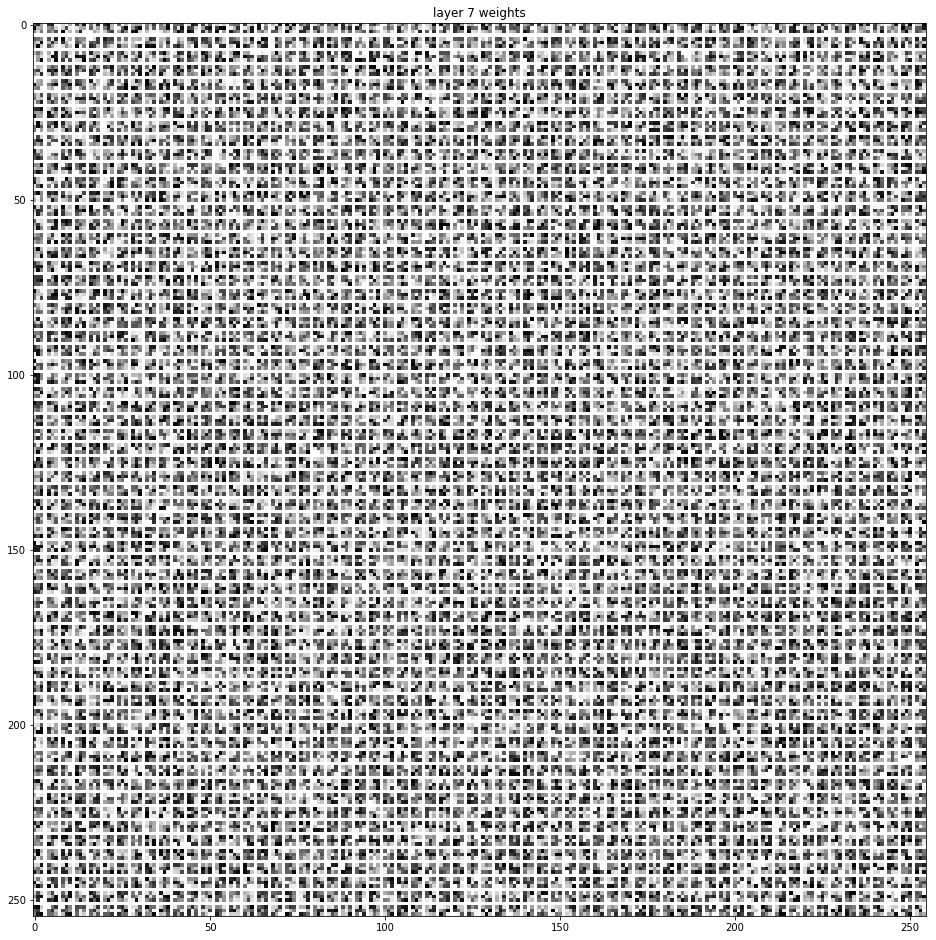

Pre-trained model layer 7 weights:
(3, 3, 3, 4096)
(3, 3, 4096)
W shape :  (3, 3, 4096)
Weights mean -0.0001617056259419769
(255, 255)


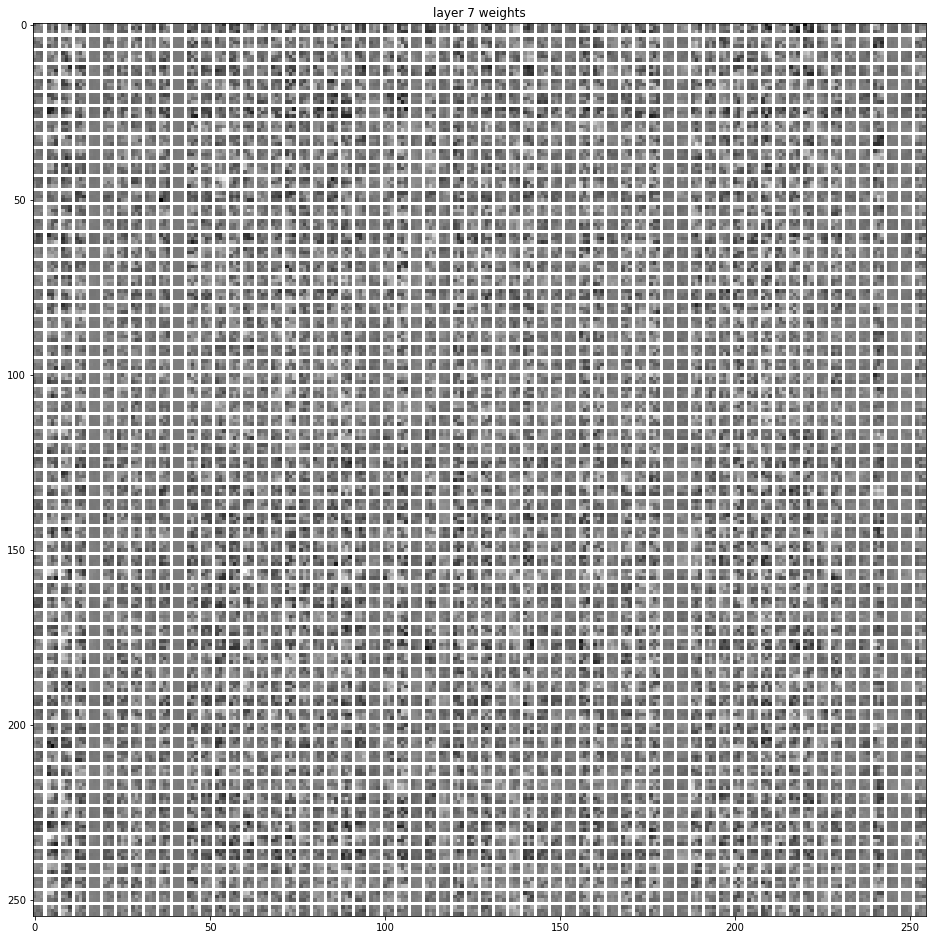

Fine-tuned model layer 7 weights:
(3, 3, 3, 4096)
(3, 3, 4096)
W shape :  (3, 3, 4096)
Weights mean -0.00033401668770238757
(255, 255)


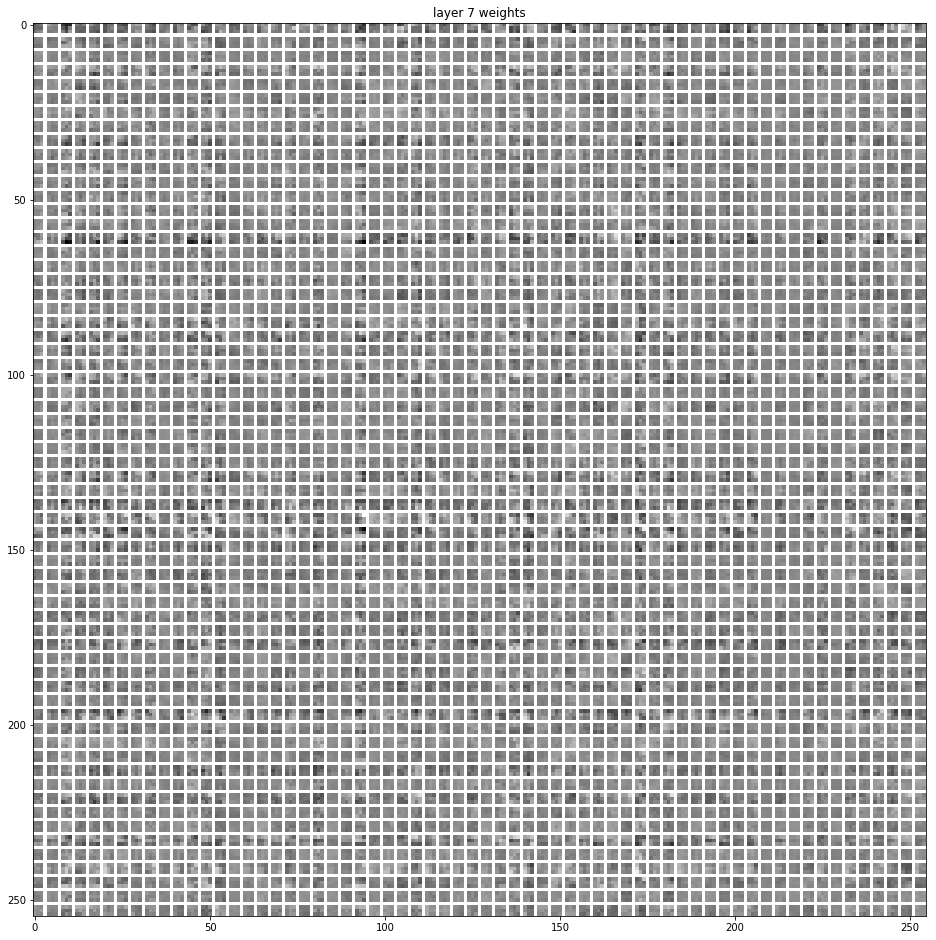

In [11]:
l = 7
# Visualize weights
print("Random model layer {} weights:".format(l))
visualize_weights(model_untrained, layer=l, nrows=64, figsize=(16, 32))
print("Pre-trained model layer {} weights:".format(l))
visualize_weights(model, layer=l, nrows=64, figsize=(16, 32))
print("Fine-tuned model layer {} weights:".format(l))
visualize_weights(model_fine_tuned, layer=l, nrows=64, figsize=(16, 32))

# Quantitative comparison

In [12]:
import seaborn as sns

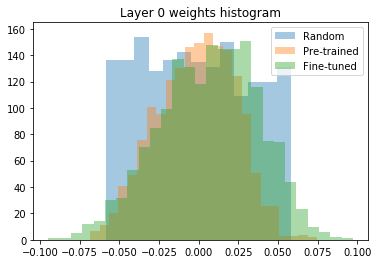

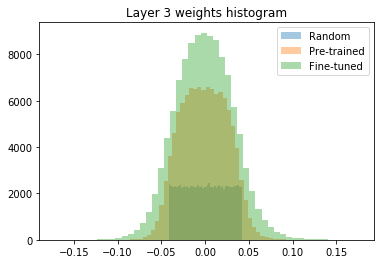

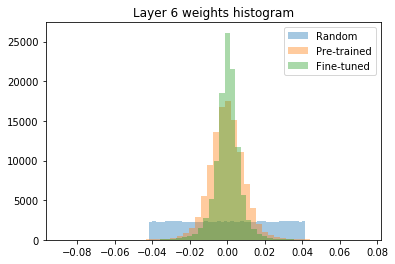

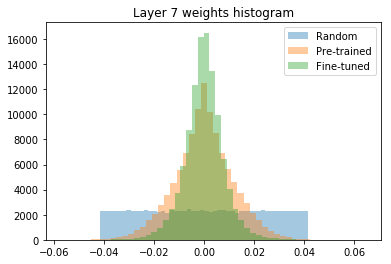

In [22]:
for layer in [0, 3, 6, 7]:
    sns.distplot(np.ravel(model_untrained.layers[layer].get_weights()[0]), hist=True, kde=False)
    sns.distplot(np.ravel(model.layers[layer].get_weights()[0]), hist=True, kde=False)
    sns.distplot(np.ravel(model_fine_tuned.layers[layer].get_weights()[0]), hist=True, kde=False)
    plt.legend(["Random", "Pre-trained", "Fine-tuned"])
    plt.title("Layer {} weights histogram".format(layer))
    plt.show()

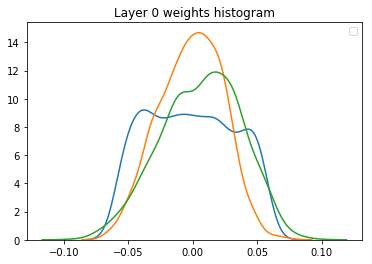

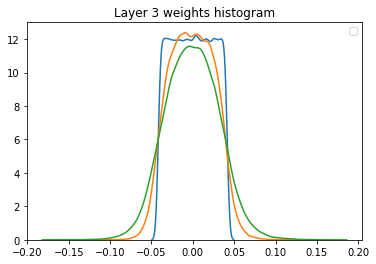

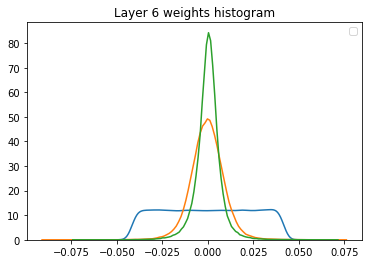

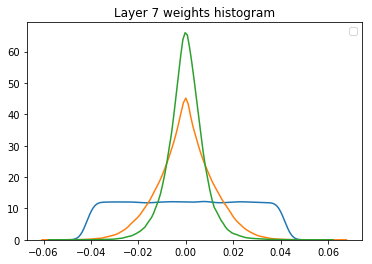

In [21]:
for layer in [0, 3, 6, 7]:
    sns.distplot(np.ravel(model_untrained.layers[layer].get_weights()[0]), hist=False, kde=True)
    sns.distplot(np.ravel(model.layers[layer].get_weights()[0]), hist=False, kde=True)
    sns.distplot(np.ravel(model_fine_tuned.layers[layer].get_weights()[0]), hist=False, kde=True)
    plt.legend(["Random", "Pre-trained", "Fine-tuned"])
    plt.title("Layer {} weights histogram".format(layer))
    plt.show()

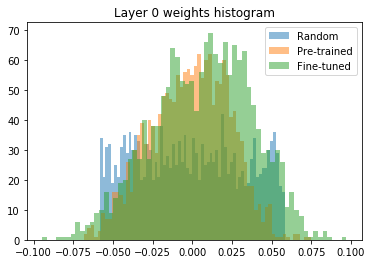

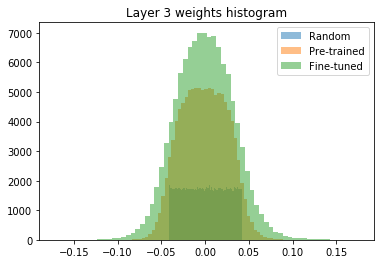

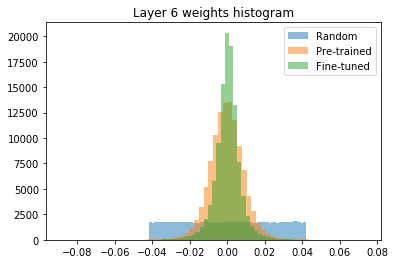

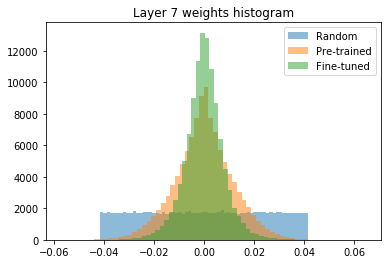

In [19]:
for layer in [0, 3, 6, 7]:
    plt.hist(np.ravel(model_untrained.layers[layer].get_weights()[0]), bins=64, alpha=0.5)
    plt.hist(np.ravel(model.layers[layer].get_weights()[0]), bins=64, alpha=0.5)
    plt.hist(np.ravel(model_fine_tuned.layers[layer].get_weights()[0]), bins=64, alpha=0.5)
    plt.legend(["Random", "Pre-trained", "Fine-tuned"])
    plt.title("Layer {} weights histogram".format(layer))
    plt.show()